## Week 8: Final Lab
### Note: We will end early today.

## Agenda:
### Grievances (5-10)
### Pandas & Seaborn (15-20)
### Final Q&A (5-10)

## Final Grievances / AI Use Discussion
### Now that we can use AI, everything is perfect, right? Right?

# Resource for learning python for data-stuffs.
## Kaggle: https://www.kaggle.com/
### Data & analysis project sharing platform, free to use.
### File used today: https://www.kaggle.com/datasets/zahidmughal2343/video-games-sale

<br><br>

## Seaborn: https://seaborn.pydata.org/tutorial/introduction.html
## Much of learning how to program beyond here is finding and reading documentation.

In [ ]:
# Pandas & Seaborn
import pandas as pd
import seaborn as sns

# from pathlib import Path
# current_directory = Path.cwd()
# print(current_directory)

# read csv (comma separated values) files
vgs_data = pd.read_csv('video games sales.csv')
# read_csv automatically creates a Pandas dataframe. neat!

# get quick summary of dataframe
vgs_data.head()

# what games sold the most overall?
vgs_data.sort_values(by='Global_Sales', ascending=False).head()

In [60]:
# # what Wii games sold the most globally in 2007?
vgs_data[(vgs_data['Platform'] == 'Wii') & (vgs_data['Year'] == 2007)].sort_values(by='Global_Sales', ascending=False)

Rank                                      Name Platform    Year  \
13        14                                   Wii Fit      Wii  2007.0   
48        49                        Super Mario Galaxy      Wii  2007.0   
80        81                             Mario Party 8      Wii  2007.0   
85        86        Mario & Sonic at the Olympic Games      Wii  2007.0   
150      151         LEGO Star Wars: The Complete Saga      Wii  2007.0   
...      ...                                       ...      ...     ...   
16253  16256  Doraemon Wii: Himitsu Douguou Ketteisen!      Wii  2007.0   
16486  16489           Case Closed: One Truth Prevails      Wii  2007.0   
16517  16520              Teenage Mutant Ninja Turtles      Wii  2007.0   
16552  16555  Mahou Sensei Negima!? Neo-Pactio Fight!!      Wii  2007.0   
16573  16576                       Mini Desktop Racing      Wii  2007.0   

           Genre                     Publisher  NA_Sales  EU_Sales  JP_Sales  \
13        Sports                      Nintendo      8.94      8.03      3.60   
48      Platform                      Nintendo      6.16      3.40      1.20   
80          Misc                      Nintendo      3.81      2.30      1.58   
85        Sports                          Sega      2.58      3.90      0.66   
150       Action                     LucasArts      3.66      1.63      0.00   
...          ...                           ...       ...       ...       ...   
16253       Misc                          Sega      0.00      0.00      0.01   
16486  Adventure                       Nobilis      0.00      0.00      0.01   
16517     Action  Konami Digital Entertainment      0.00      0.01      0.00   
16552   Fighting         Marvelous Interactive      0.00      0.00      0.01   
16573     Racing                Popcorn Arcade      0.01      0.00      0.00   

       Other_Sales  Global_Sales    NA_Share  
13            2.15         22.72   39.348592  
48            0.76         11.52   53.472222  
80            0.73          8.42   45.249406  
85            0.91          8.06   32.009926  
150           0.53          5.83   62.778731  
...            ...           ...         ...  
16253         0.00          0.01    0.000000  
16486         0.00          0.01    0.000000  
16517         0.00          0.01    0.000000  
16552         0.00          0.01    0.000000  
16573         0.00          0.01  100.000000  

[187 rows x 12 columns]

In [42]:
# Let's make a new column. What share of global sales came from North America?
# Why the = here?
vgs_data['NA_Share'] = vgs_data['NA_Sales'].div(vgs_data['Global_Sales']).multiply(100)
vgs_data[['Name', 'Global_Sales', 'NA_Share']].sort_values(by=['NA_Share', 'Global_Sales'], ascending=False)

Name  Global_Sales  \
878                        Who wants to be a millionaire          1.94   
1205                     Command & Conquer: Tiberian Sun          1.55   
4598              SpongeBob's Truth or Square (US sales)          0.42   
4684                    Tomb Raider: The Last Revelation          0.41   
4903              SpongeBob's Truth or Square (US sales)          0.39   
...                                                  ...           ...   
16587                           Mezase!! Tsuri Master DS          0.01   
16589  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...          0.01   
16590  Eiyuu Densetsu: Sora no Kiseki Material Collec...          0.01   
16595   SCORE International Baja 1000: The Official Game          0.01   
16596                                         Know How 2          0.01   

       NA_Share  
878       100.0  
1205      100.0  
4598      100.0  
4684      100.0  
4903      100.0  
...         ...  
16587       0.0  
16589       0.0  
16590       0.0  
16595       0.0  
16596       0.0  

[16598 rows x 3 columns]

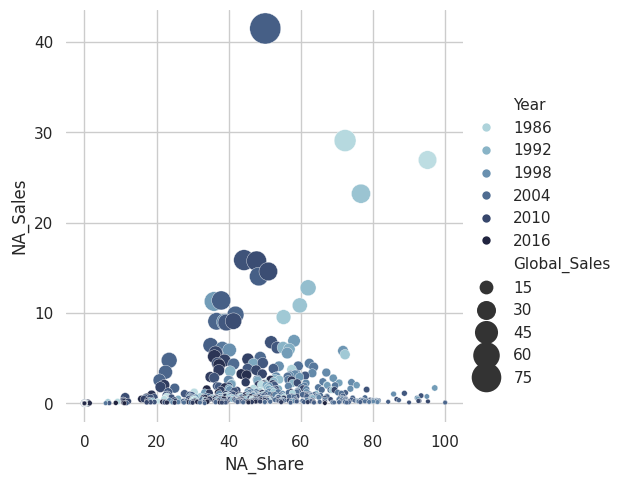

In [58]:
# Data viz example

vgs_data_nintendo = vgs_data[(vgs_data['Publisher'] == 'Nintendo')]

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=vgs_data_nintendo,
    x="NA_Share", y="NA_Sales",
    hue="Year", size="Global_Sales",
    palette=cmap, sizes=(10, 500),
)
# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [59]:
# Which Nintendo game is that mega-seller?
vgs_data_nintendo.sort_values(by='NA_Sales', ascending=False)

Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                  Super Mario Bros.      NES   
9         10                                          Duck Hunt      NES   
5          6                                             Tetris       GB   
2          3                                     Mario Kart Wii      Wii   
...      ...                                                ...      ...   
11282  11284                          Famicom Mini: Mario Bros.      GBA   
12373  12375               Mario vs. Donkey Kong: Tipping Stars      3DS   
12499  12501                     Eigo de Tabisuru: Little Charo       DS   
12619  12621  Tabi no Yubisashi Kaiwachou DS: DS Series 3 Ka...       DS   
16542  16545  Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS   

         Year     Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0      2006.0    Sports  Nintendo     41.49     29.02      3.77         8.46   
1      1985.0  Platform  Nintendo     29.08      3.58      6.81         0.77   
9      1984.0   Shooter  Nintendo     26.93      0.63      0.28         0.47   
5      1989.0    Puzzle  Nintendo     23.20      2.26      4.22         0.58   
2      2008.0    Racing  Nintendo     15.85     12.88      3.79         3.31   
...       ...       ...       ...       ...       ...       ...          ...   
11282  2004.0  Platform  Nintendo      0.00      0.00      0.08         0.00   
12373  2015.0    Puzzle  Nintendo      0.00      0.00      0.06         0.00   
12499  2011.0      Misc  Nintendo      0.00      0.00      0.06         0.00   
12619  2006.0      Misc  Nintendo      0.00      0.00      0.06         0.00   
16542  2015.0      Misc  Nintendo      0.00      0.00      0.01         0.00   

       Global_Sales   NA_Share  
0             82.74  50.145033  
1             40.24  72.266402  
9             28.31  95.125397  
5             30.26  76.668870  
2             35.82  44.249023  
...             ...        ...  
11282          0.08   0.000000  
12373          0.06   0.000000  
12499          0.06   0.000000  
12619          0.06   0.000000  
16542          0.01   0.000000  

[703 rows x 12 columns]

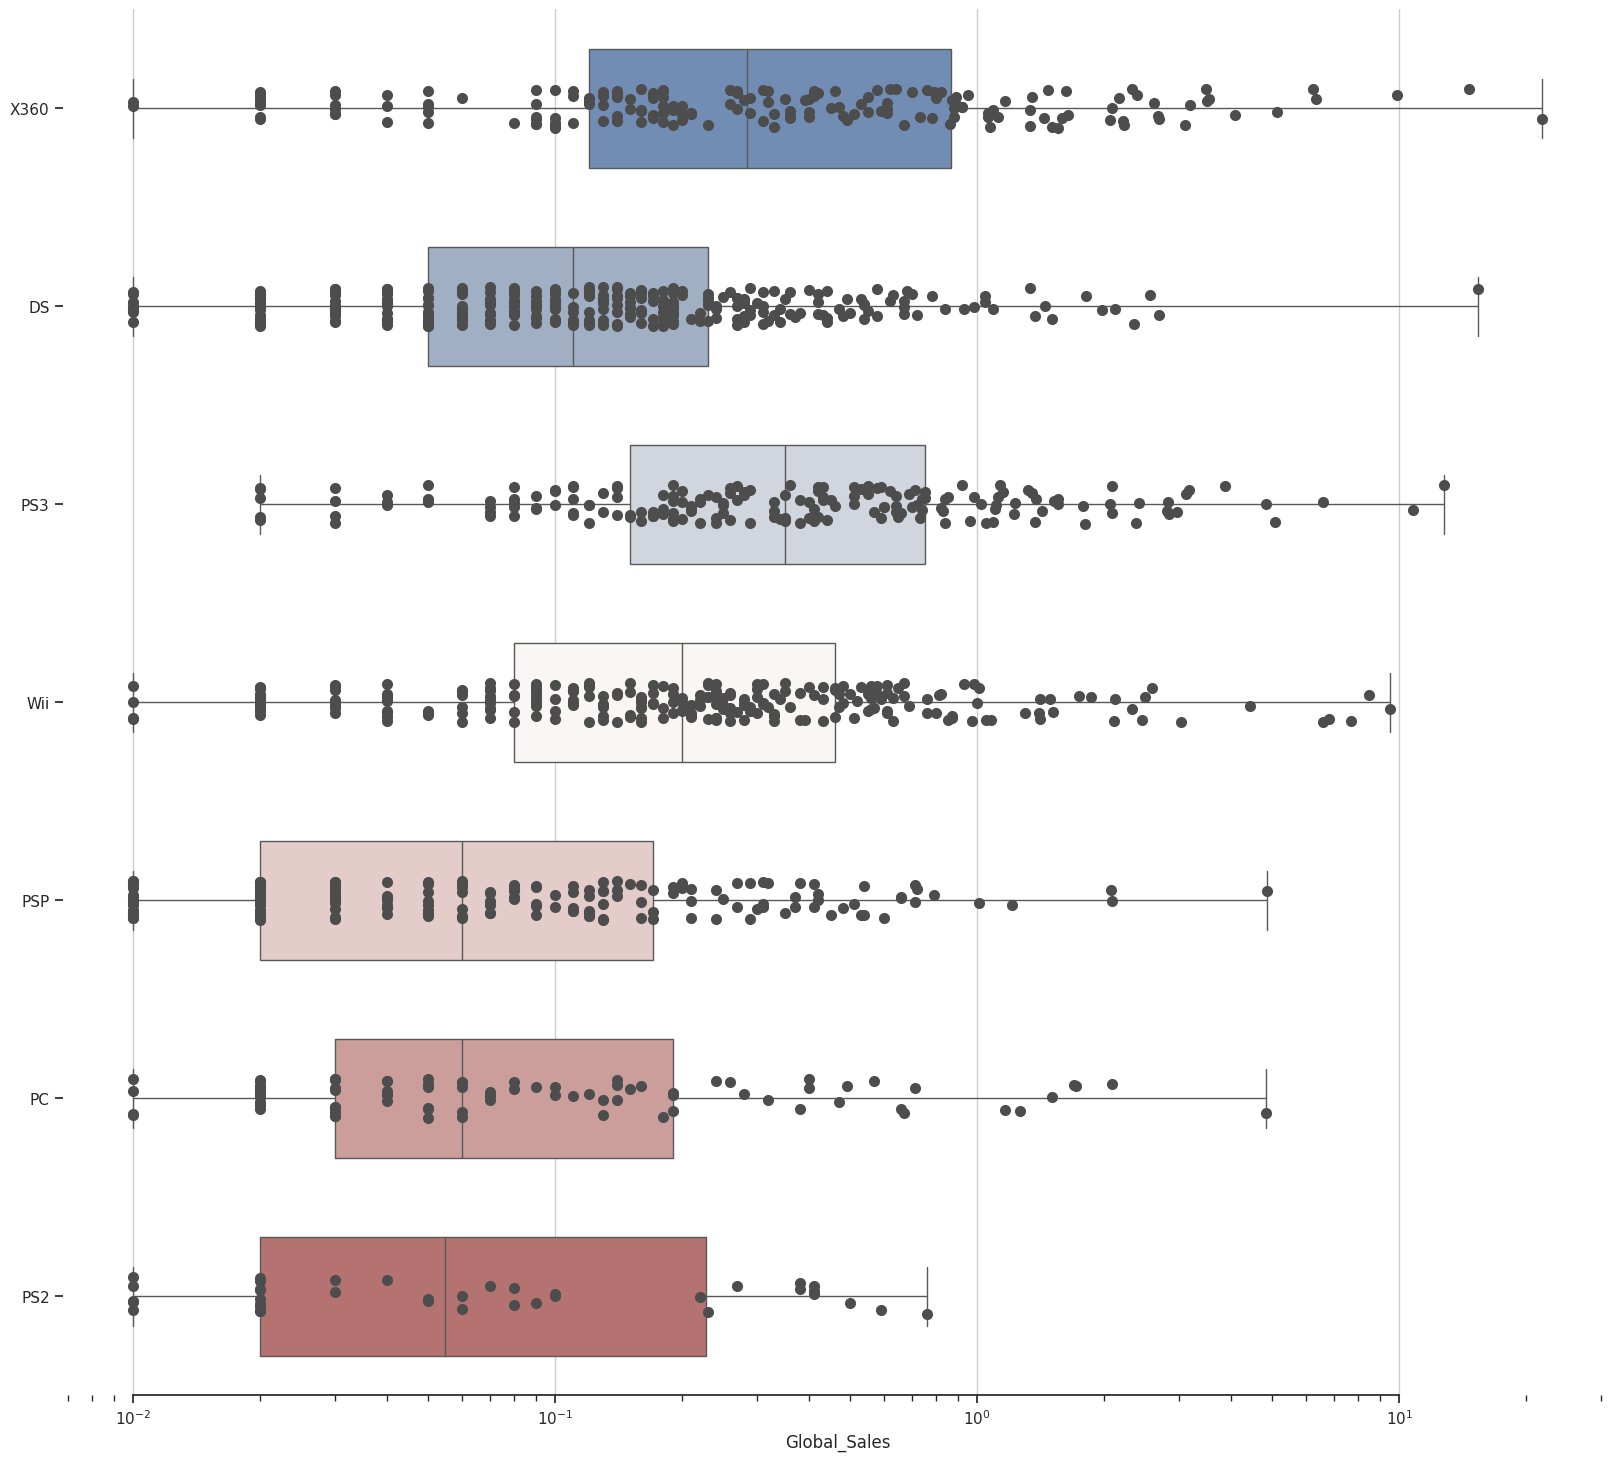

In [70]:
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

vgs_data_2010 = vgs_data[vgs_data['Year'] == 2010]

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 18))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    vgs_data_2010, x="Global_Sales", y="Platform", hue="Platform",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(vgs_data_2010, x="Global_Sales", y="Platform", size=8, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# Stay in Touch!
# LinkedIn

![QR](QR.JPG)